In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

# Part 1

## (a) 

In [37]:
auto = pd.read_csv("Auto.csv", na_values="?")
auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,397.000000,397.000000,397.000000,392.000000,397.000000,397.000000,397.000000,397.000000
mean,23.515869,5.458438,193.532746,104.469388,2970.261965,15.555668,75.994962,1.574307
std,7.825804,1.701577,104.379583,38.491160,847.904119,2.749995,3.690005,0.802549
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,75.000000,2223.000000,13.800000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,93.500000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,126.000000,3609.000000,17.100000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


## (b) Scatterplot Matrix

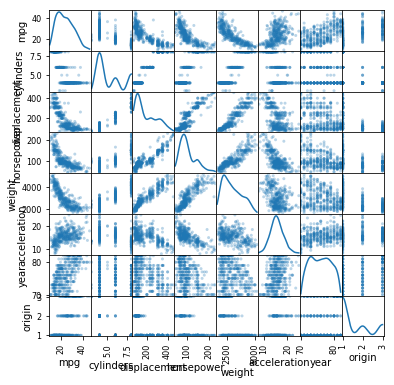

In [38]:
from pandas.plotting import scatter_matrix
df_quant = auto.loc[:, "mpg":"origin"]
scatter_matrix(df_quant, alpha = 0.3, figsize = (6,6), diagonal = 'kde')
plt.show()

## (c) Correlation Matrix

In [14]:
df_quant.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.776260,-0.804443,-0.778427,-0.831739,0.422297,0.581469,0.563698
cylinders,-0.776260,1.000000,0.950920,0.842983,0.897017,-0.504061,-0.346717,-0.564972
displacement,-0.804443,0.950920,1.000000,0.897257,0.933104,-0.544162,-0.369804,-0.610664
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.831739,0.897017,0.933104,0.864538,1.000000,-0.419502,-0.307900,-0.581265
acceleration,0.422297,-0.504061,-0.544162,-0.689196,-0.419502,1.000000,0.282901,0.210084
year,0.581469,-0.346717,-0.369804,-0.416361,-0.307900,0.282901,1.000000,0.184314
origin,0.563698,-0.564972,-0.610664,-0.455171,-0.581265,0.210084,0.184314,1.000000


## (d) OLS

In [39]:
ols_res = sm.OLS(df_quant.mpg, df_quant.iloc[:,1:8], hasconst= True, missing = "drop").fit()
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     282.8
Date:                Fri, 02 Feb 2018   Prob (F-statistic):          9.75e-138
Time:                        23:33:14   Log-Likelihood:                -1030.4
No. Observations:                 392   AIC:                             2075.
Df Residuals:                     385   BIC:                             2103.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.7055      0.323     -2.181      0.030      -1.341      -0.070
displacement     0.0219      0.008      2.871      0.004       0.007       0.037
horsepower      -0.0396      0.013     -3.147      0.002      -0.064      -0.015
weight          -0.0060      0.001     -9.258      0.000      -0.007      -0.005
acceleration    -0.0796      0.090     -0.881      0.379      -0.257       0.098
year             0.5836      0.024     24.150      0.000       0.536       0.631
origin           1.3100      0.281      4.663      0.000       0.758       1.862
==============================================================================
Omnibus:                       46.837   Durbin-Watson:                   1.283
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.015
Skew:                           0.681   Prob(JB):                     2.84e-20
Kurtosis:                       4.912   Cond. No.                     6.00e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

1. Displacement, horsepower, weight, year and origin are significant at 1% level;
2. Acceleration is not significant at 10% level;
3. The miles per gallon increases 0.5836 on average as the vehicle is released every one year later.

## (e)

displacement, horsepower, and weight are three variables that look most likely to have a nonlinear relationship with mpg.
Before adding them to the regression model, we'd better center these variable

In [40]:
df_quant['displacement2'] = df_quant.displacement**2
df_quant['horsepower2'] = df_quant.horsepower**2
df_quant['weight2'] = df_quant.weight**2
df_quant['acceleration2'] = df_quant.acceleration**2
df_quant.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,displacement2,horsepower2,weight2,acceleration2
0,18.0,8,307.0,130.0,3504,12.0,70,1,94249.0,16900.0,12278016,144.00
1,15.0,8,350.0,165.0,3693,11.5,70,1,122500.0,27225.0,13638249,132.25
2,18.0,8,318.0,150.0,3436,11.0,70,1,101124.0,22500.0,11806096,121.00
3,16.0,8,304.0,150.0,3433,12.0,70,1,92416.0,22500.0,11785489,144.00
4,17.0,8,302.0,140.0,3449,10.5,70,1,91204.0,19600.0,11895601,110.25


In [44]:
ols_res2 = sm.OLS(df_quant.mpg, df_quant.iloc[:,1:], hasconst= True, missing = "drop").fit()
print("Adjusted R squared of the new model is {}".format(ols_res2.rsquared_adj))
ols_res2.summary()


Adjusted R squared of the new model is 0.8629225884440221


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     247.1
Date:                Fri, 02 Feb 2018   Prob (F-statistic):          9.18e-160
Time:                        23:36:27   Log-Likelihood:                -966.62
No. Observations:                 392   AIC:                             1955.
Df Residuals:                     381   BIC:                             1999.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
cylinders         0.4668      0.321      1.453      0.147      -0.165       1.099
displacement     -0.0387      0.019     -2.002      0.046      -0.077      -0.001
horsepower       -0.1489      0.041     -3.605      0.000      -0.230      -0.068
weight           -0.0105      0.003     -4.196      0.000      -0.015      -0.006
acceleration     -0.8294      0.370     -2.241      0.026      -1.557      -0.102
year              0.8403      0.040     20.799      0.000       0.761       0.920
origin            0.6432      0.266      2.422      0.016       0.121       1.165
displacement2  6.885e-05   3.29e-05      2.090      0.037    4.07e-06       0.000
horsepower2       0.0004      0.000      2.801      0.005       0.000       0.001
weight2        9.853e-07   3.27e-07      3.009      0.003    3.41e-07    1.63e-06
acceleration2     0.0225      0.012      1.917      0.056      -0.001       0.046
==============================================================================
Omnibus:                       29.522   Durbin-Watson:                   1.507
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.685
Skew:                           0.445   Prob(JB):                     4.91e-13
Kurtosis:                       4.637   Cond. No.                     2.83e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

2. adjusted $R^2$ is 0.8629, higher than that of the previous model (0.812).
3. The significance of displacement is lower than it in the previous model but still significant at 5% level; The quadratic term is also significant at 5% level.
4. Cylinders becomes insignicant at 10% level. Before it is significant at 5% level.

### (f)

In [47]:
ols_res2.predict([6, 200, 100, 3100, 15.1, 99, 1, 200**2, 100**2, 3100**2, 15.1**2])

array([ 40.18365842])

The predicted miles per gallon mpg for that car is 40.1837

# Part 2

In [97]:
class KNN:
    def __init__(self, X, y):
        self.X = X
        self.y = y
    
    def distance(self,x0):
        return np.sqrt(np.sum((X - x0)**2, axis = 1))
    
    def prob(self,x0, k):
        dist = self.distance(x0)
        idx = np.argpartition(dist, k)[:k]
        return np.mean(y[idx])
    
    def predict(self, x0, k):
        return np.round(self.prob(x0, k))

In [98]:
X = np.array([
    [0,3,0],
    [2,0,0],
    [0,1,3],
    [0,1,2],
    [-1,0,1],
    [1,1,1]
])
y = np.array([1,1,1,0,0,1]).reshape((6,1))
x0 = np.array(((0,0,0)))
knn = KNN(X, y)

## (a)

In [99]:
knn.distance(x0)

array([ 3.        ,  2.        ,  3.16227766,  2.23606798,  1.41421356,
        1.73205081])

## (b)

In [100]:
knn.prob(x0, 1)

0.0

The probability of it being red is 0, and thus the prediction is green.

##  (c)

In [101]:
knn.prob(x0, 3)

0.66666666666666663

The probability of it being red is 0.67, and thus the prediction is red.

## (d)

K should be smaller. Because if the optimal decision boundary is non-linear, with larger K this method tend to ignore information and thus underfit the data, creating a boundary without much contour.

## (e)

In [83]:
from sklearn import neighbors, linear_model
knn2 = neighbors.KNeighborsClassifier(n_neighbors=2)
knn_res = knn2.fit(X, y.ravel())
knn_res.predict(np.array([[1,1,1]]))

array([0])

The prediction for that point is green.

# Part 3

In [218]:
auto = pd.read_csv("Auto.csv", na_values="?")
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [219]:
auto['mpg_high'] = (auto.mpg >= auto.mpg.median()).astype("int")
auto1 = auto.dropna()

In [223]:
auto1.loc[:,"const"] = np.ones(auto1.shape[0])

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [224]:
X = pd.concat((auto1.loc[:,"cylinders":"origin"], auto1.const), axis = 1)

In [225]:
X

,cylinders,displacement,horsepower,weight,acceleration,year,origin,const
0,8,307.0,130.0,3504,12.0,70,1,1.0
1,8,350.0,165.0,3693,11.5,70,1,1.0
2,8,318.0,150.0,3436,11.0,70,1,1.0
3,8,304.0,150.0,3433,12.0,70,1,1.0
4,8,302.0,140.0,3449,10.5,70,1,1.0
5,8,429.0,198.0,4341,10.0,70,1,1.0
6,8,454.0,220.0,4354,9.0,70,1,1.0
7,8,440.0,215.0,4312,8.5,70,1,1.0
8,8,455.0,225.0,4425,10.0,70,1,1.0
9,8,390.0,190.0,3850,8.5,70,1,1.0


## (a)

In [226]:
lm = sm.Logit(auto1.mpg_high, X).fit()
lm.summary()

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sat, 03 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        01:41:03   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.1626      0.423     -0.384      0.701      -0.992       0.667
displacement     0.0021      0.012      0.174      0.862      -0.021       0.026
horsepower      -0.0410      0.024     -1.718      0.086      -0.088       0.006
weight          -0.0043      0.001     -3.784      0.000      -0.007      -0.002
acceleration     0.0161      0.141      0.114      0.910      -0.261       0.293
year             0.4295      0.075      5.709      0.000       0.282       0.577
origin           0.4773      0.362      1.319      0.187      -0.232       1.187
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

Weight and year are significant at 5% level, with coefficients are -0.0043 and 0.4295 respectively.

## (b)

In [174]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(auto1.loc[:,'cylinders':"origin"], auto1.mpg_high, test_size = 0.5, random_state=10)

## (c)

In [187]:
from sklearn import linear_model
logistic = linear_model.LogisticRegression()

logistic.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [243]:
var = ["cylinders","displacement","horsepower","weight","acceleration","year","origin", "Intercept"]

coef = pd.DataFrame(
    {"vars": var,
    "Coef.": np.concatenate((logistic.coef_.ravel(), logistic.intercept_))}
)

In [239]:
coef

,Coef.,vars
0,-0.330396,cylinders
1,0.000398,displacement
2,-0.052435,horsepower
3,-0.004909,weight
4,-0.182542,acceleration
5,0.309452,year
6,-0.093899,origin
7,-0.031943,Intercept


In [227]:
logistic.coef_

array([[-0.3303963 ,  0.00039844, -0.05243505, -0.00490894, -0.18254184,
         0.30945211, -0.09389898]])

In [228]:
logistic.intercept_

array([-0.03194268])

In [229]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = logistic.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)

In [231]:
confusion_matrix

array([[86, 13],
       [12, 85]])

In [232]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



This model's predictive power for low mpg and high mpg are at the same level. It's hard to say which one is better.